In [3]:
# libs
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display

 EL OBJETIVO DEL ANALISIS ES ENCONTRAR INSIGHT PARA LA EMPRESA Y <br>
 POR ULTIMO REALIZAR UN MODELO DE ML PARA PREDECIR LA BAJA DE UNA POLIZA DE SEGURO <br>
 THE MAIN GOALS IS FIND INSIGHT IN THE DATASET FOR THE COMPANY<br>
 AND FOR LAST MAKE A MACHINE MODEL TO PREDICT WITCH CLIENT WILL REMOVE HIS INSURE.<br>

In [4]:
# reads the data
# Taken from https://www.kaggle.com/code/ycanario/home-insurance-in-r/notebook

df = pd.read_csv('home_insurance.csv')

In [5]:
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 50)
# see file --> understandingData.txt

In [6]:
# checking de info in the dataset
print(df.shape)
df.head(5)
#print(df.info())

(256136, 66)


,QUOTE_DATE,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,P1_PT_EMP_STATUS,BUS_USE,CLERICAL,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,AD_CONTENTS,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,NCD_GRANTED_YEARS_C,CONTENTS_COVER,BUILDINGS_COVER,SPEC_SUM_INSURED,SPEC_ITEM_PREM,UNSPEC_HRP_PREM,P1_DOB,P1_MAR_STATUS,P1_POLICY_REFUSED,P1_SEX,APPR_ALARM,APPR_LOCKS,BEDROOMS,ROOF_CONSTRUCTION,WALL_CONSTRUCTION,FLOODING,LISTED,MAX_DAYS_UNOCC,NEIGH_WATCH,OCC_STATUS,OWNERSHIP_TYPE,PAYING_GUESTS,PROP_TYPE,SAFE_INSTALLED,SEC_DISC_REQ,SUBSIDENCE,YEARBUILT,CAMPAIGN_DESC,PAYMENT_METHOD,PAYMENT_FREQUENCY,LEGAL_ADDON_PRE_REN,LEGAL_ADDON_POST_REN,HOME_EM_ADDON_PRE_REN,HOME_EM_ADDON_POST_REN,GARDEN_ADDON_PRE_REN,GARDEN_ADDON_POST_REN,KEYCARE_ADDON_PRE_REN,KEYCARE_ADDON_POST_REN,HP1_ADDON_PRE_REN,HP1_ADDON_POST_REN,HP2_ADDON_PRE_REN,HP2_ADDON_POST_REN,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,MTA_FAP,MTA_APRP,MTA_DATE,LAST_ANN_PREM_GROSS,POL_STATUS,i,Police
0,11/22/2007,22/11/2007,N,R,NaN,N,NaN,Y,19.0,1000000.0,7.0,Y,6.0,50000.0,7.0,Y,Y,7500.0,44.42,12.45,15/06/1939,O,N,M,N,Y,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,10.0,Y,Y,N,1960.0,NaN,PureDD,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,274.81,Lapsed,1,P000001
1,11/22/2007,01/01/2008,N,E,NaN,Y,N,Y,25.0,1000000.0,6.0,Y,9.0,50000.0,7.0,Y,Y,0.0,0.00,24.60,20/05/1970,M,N,M,N,N,3.0,11.0,15.0,Y,3.0,0.0,N,PH,3.0,0.0,2.0,N,N,N,1960.0,NaN,PureDD,NaN,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,308.83,-9.27,NaN,308.83,Live,2,P000002
2,11/23/2007,23/11/2007,N,E,NaN,N,NaN,N,NaN,0.0,0.0,Y,12.0,50000.0,7.0,N,Y,0.0,0.00,0.00,10/06/1947,S,N,M,Y,Y,2.0,11.0,15.0,Y,3.0,0.0,Y,PH,8.0,0.0,9.0,N,Y,N,1946.0,NaN,PureDD,NaN,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,52.65,52.65,03/11/2010,52.65,Live,3,P000003
3,11/23/2007,12/12/2007,N,R,NaN,N,NaN,N,NaN,0.0,0.0,Y,14.0,50000.0,7.0,N,Y,0.0,0.00,0.00,16/12/1925,W,N,F,N,Y,2.0,11.0,15.0,Y,3.0,0.0,N,PH,18.0,0.0,19.0,N,Y,N,1870.0,NaN,NonDD,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,54.23,Live,4,P000004
4,11/22/2007,15/12/2007,N,R,NaN,N,NaN,Y,5.0,1000000.0,7.0,Y,10.0,50000.0,7.0,Y,Y,0.0,0.00,19.82,11/02/1936,M,N,M,Y,Y,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,1.0,N,Y,N,1960.0,NaN,DD-Other,NaN,Y,Y,N,N,Y,Y,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,244.58,Live,5,P000005


In [7]:
df.describe()

,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,NCD_GRANTED_YEARS_C,SPEC_SUM_INSURED,SPEC_ITEM_PREM,UNSPEC_HRP_PREM,BEDROOMS,ROOF_CONSTRUCTION,WALL_CONSTRUCTION,LISTED,MAX_DAYS_UNOCC,OWNERSHIP_TYPE,PAYING_GUESTS,PROP_TYPE,YEARBUILT,CAMPAIGN_DESC,PAYMENT_FREQUENCY,MTA_FAP,MTA_APRP,LAST_ANN_PREM_GROSS,i
count,140876.000000,189021.000000,189021.000000,180290.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,0.0,80554.0,55720.000000,55720.000000,190039.000000,256136.000000
mean,10.274440,778130.472276,4.477132,9.055649,47836.219256,5.497336,329.517122,2.507135,5.653579,2.779712,11.020611,14.977976,2.995672,8.471276,7.646214,0.001095,10.230170,1944.994715,NaN,1.0,200.938091,90.613137,186.841196,128068.500000
std,8.449942,415504.938301,2.677538,7.624659,10706.355022,1.777452,1333.646192,10.666524,10.254535,0.801433,0.885396,0.870018,0.083708,15.213401,2.543281,0.033075,8.949343,28.903691,NaN,0.0,107.947457,122.043969,99.516851,73940.238612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1749.000000,NaN,1.0,-1152.680000,-423.080000,-1152.680000,1.000000
25%,3.000000,1000000.000000,3.000000,3.000000,50000.000000,6.000000,0.000000,0.000000,0.000000,2.000000,11.000000,15.000000,3.000000,0.000000,8.000000,0.000000,2.000000,1920.000000,NaN,1.0,137.410000,0.000000,123.580000,64034.750000
50%,9.000000,1000000.000000,6.000000,7.000000,50000.000000,6.000000,0.000000,0.000000,0.000000,3.000000,11.000000,15.000000,3.000000,0.000000,8.000000,0.000000,10.000000,1946.000000,NaN,1.0,189.035000,0.000000,177.390000,128068.500000
75%,14.000000,1000000.000000,6.000000,13.000000,50000.000000,6.000000,0.000000,0.000000,12.450000,3.000000,11.000000,15.000000,3.000000,30.000000,8.000000,0.000000,18.000000,1960.000000,NaN,1.0,248.920000,180.902500,235.090000,192102.250000
max,98.000000,1000000.000000,9.000000,98.000000,100000.000000,9.000000,47500.000000,973.530000,162.610000,7.000000,99.000000,99.000000,5.000000,181.000000,18.000000,1.000000,53.000000,2000.000000,NaN,1.0,4631.860000,1449.240000,4631.860000,256136.000000


NA  0


POL_STATUS
Cancelled      4311
Lapsed        52534
Live         132160
Unknown       67131
Name: i, dtype: int64

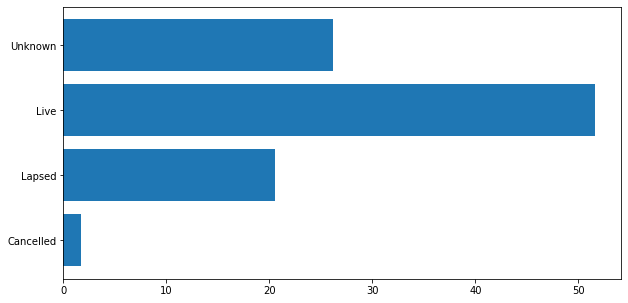

In [35]:
# lets check de amount of Policys by his state
from matplotlib.ticker import FuncFormatter
print("NA ", df['POL_STATUS'].isna().sum())

df.POL_STATUS  = df.POL_STATUS.fillna('Unknown')

d = df.groupby("POL_STATUS")["i"].count()
display(d)

# Graficamos el Estado de las Polizas 
plt.figure(figsize=(10,5))
# show percentages 

plt.barh(d.index, ((d.values *100)/ df.shape[0])).set_label("polizas")

cheking ... 67115
Variable Sexo de acuerdo al Estado de las Polizas


P1_SEX,F,M,N,All
POL_STATUS,,,,
Cancelled,2011,2299,1,4311
Lapsed,21349,31157,28,52534
Live,62561,69540,59,132160
Unknown,9,7,0,16
All,85930,103003,88,189021


<AxesSubplot:xlabel='POL_STATUS'>

<Figure size 720x360 with 0 Axes>

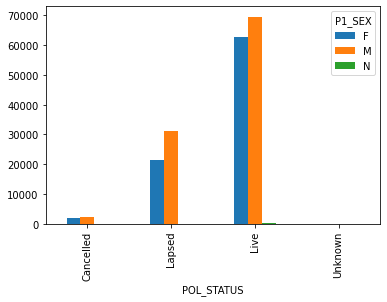

In [21]:
# Conociendo a los asegurados
# Sexo de nuestros afiliados
# print(print("cheking ...",df.isna().sum()))
# chequeando los nulls y convirtiendolos en 0
print("cheking ...",df['P1_SEX'].isna().sum())
plt.figure(figsize=(10,5))
#print("cheking 2 ...",df.groupby('P1_SEX').count().reset_index())
#tabla3 = pd.crosstab(  [df.Sex, df.Pclass],    df.Survived,    rownames = ["Sexo", "Clase"],    colnames = ["Survived"]) .style.format('{:.2%}')   .style.format('{:.2%}')
tabla_sexo = pd.crosstab([df.POL_STATUS], df.P1_SEX, margins=True)
print("Variable Sexo de acuerdo al Estado de las Polizas")
display(tabla_sexo,  pd.crosstab([df.POL_STATUS], df.P1_SEX).plot(kind='bar'))

#df['P1_SEX'] = df['P1_SEX'].fillna(0)

In [ ]:

df['POL_STATUS'] = df['POL_STATUS'].astype("string")
df['P1_SEX'] = df['P1_SEX'].astype("category")

# cambiar a variable categorica el valor de sexo (chequear los valores nan, etc)



codificador = OneHotEncoder()

codificacion = codificador.fit_transform(df[['P1_SEX']])

print("-->", type(codificacion))
print(":::->", codificacion)

new_col = pd.DataFrame(codificacion.toarray(), columns=codificador.categories_)

df = pd.concat([df, new_col], axis="columns")

df.head(5)

"""

df_aux = df[['POL_STATUS', 'P1_SEX']]

print(df_aux["POL_STATUS"].head(5))

df_pol = df_aux.groupby(['POL_STATUS']).count().reset_index() 

print(df_pol.head(5))
"""


--> <class 'scipy.sparse._csr.csr_matrix'>
:::->   (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 0)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 1)	1.0
  (8, 1)	1.0
  (9, 1)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 1)	1.0
  (18, 3)	1.0
  (19, 1)	1.0
  (20, 0)	1.0
  (21, 1)	1.0
  (22, 1)	1.0
  (23, 1)	1.0
  (24, 1)	1.0
  :	:
  (256111, 1)	1.0
  (256112, 0)	1.0
  (256113, 0)	1.0
  (256114, 0)	1.0
  (256115, 0)	1.0
  (256116, 1)	1.0
  (256117, 1)	1.0
  (256118, 1)	1.0
  (256119, 1)	1.0
  (256120, 1)	1.0
  (256121, 1)	1.0
  (256122, 1)	1.0
  (256123, 0)	1.0
  (256124, 1)	1.0
  (256125, 1)	1.0
  (256126, 1)	1.0
  (256127, 1)	1.0
  (256128, 1)	1.0
  (256129, 1)	1.0
  (256130, 0)	1.0
  (256131, 0)	1.0
  (256132, 1)	1.0
  (256133, 1)	1.0
  (256134, 1)	1.0
  (256135, 1)	1.0


'\n\ndf_aux = df[[\'POL_STATUS\', \'P1_SEX\']]\n\nprint(df_aux["POL_STATUS"].head(5))\n\ndf_pol = df_aux.groupby([\'POL_STATUS\']).count().reset_index() \n\nprint(df_pol.head(5))\n'

In [ ]:
new_col.head()
#df.head(5)


,F,M,N,NaN
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [ ]:
# rename column F
print(df.columns[66])
#df.rename(columns={"('F',)":'Fem', "('M',)":'Male'}, inplace=True)
df.rename({df.columns[66]:'Fem', df.columns[67]:'Male'}, inplace=True, axis=1)
df.head()


('F',)


,QUOTE_DATE,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,P1_PT_EMP_STATUS,BUS_USE,CLERICAL,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,AD_CONTENTS,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,NCD_GRANTED_YEARS_C,CONTENTS_COVER,BUILDINGS_COVER,SPEC_SUM_INSURED,SPEC_ITEM_PREM,UNSPEC_HRP_PREM,P1_DOB,P1_MAR_STATUS,P1_POLICY_REFUSED,P1_SEX,APPR_ALARM,APPR_LOCKS,BEDROOMS,ROOF_CONSTRUCTION,WALL_CONSTRUCTION,FLOODING,LISTED,MAX_DAYS_UNOCC,NEIGH_WATCH,...,SAFE_INSTALLED,SEC_DISC_REQ,SUBSIDENCE,YEARBUILT,CAMPAIGN_DESC,PAYMENT_METHOD,PAYMENT_FREQUENCY,LEGAL_ADDON_PRE_REN,LEGAL_ADDON_POST_REN,HOME_EM_ADDON_PRE_REN,HOME_EM_ADDON_POST_REN,GARDEN_ADDON_PRE_REN,GARDEN_ADDON_POST_REN,KEYCARE_ADDON_PRE_REN,KEYCARE_ADDON_POST_REN,HP1_ADDON_PRE_REN,HP1_ADDON_POST_REN,HP2_ADDON_PRE_REN,HP2_ADDON_POST_REN,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,MTA_FAP,MTA_APRP,MTA_DATE,LAST_ANN_PREM_GROSS,POL_STATUS,i,Police,Fem,Male,"(N,)","(nan,)"
0,11/22/2007,22/11/2007,N,R,NaN,N,NaN,Y,19.0,1000000.0,7.0,Y,6.0,50000.0,7.0,Y,Y,7500.0,44.42,12.45,15/06/1939,O,N,M,N,Y,3.0,11.0,15.0,Y,3.0,0.0,N,...,Y,Y,N,1960.0,NaN,PureDD,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,274.81,Lapsed,1,P000001,0.0,1.0,0.0,0.0
1,11/22/2007,01/01/2008,N,E,NaN,Y,N,Y,25.0,1000000.0,6.0,Y,9.0,50000.0,7.0,Y,Y,0.0,0.00,24.60,20/05/1970,M,N,M,N,N,3.0,11.0,15.0,Y,3.0,0.0,N,...,N,N,N,1960.0,NaN,PureDD,NaN,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,308.83,-9.27,NaN,308.83,Live,2,P000002,0.0,1.0,0.0,0.0
2,11/23/2007,23/11/2007,N,E,NaN,N,NaN,N,NaN,0.0,0.0,Y,12.0,50000.0,7.0,N,Y,0.0,0.00,0.00,10/06/1947,S,N,M,Y,Y,2.0,11.0,15.0,Y,3.0,0.0,Y,...,N,Y,N,1946.0,NaN,PureDD,NaN,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,52.65,52.65,03/11/2010,52.65,Live,3,P000003,0.0,1.0,0.0,0.0
3,11/23/2007,12/12/2007,N,R,NaN,N,NaN,N,NaN,0.0,0.0,Y,14.0,50000.0,7.0,N,Y,0.0,0.00,0.00,16/12/1925,W,N,F,N,Y,2.0,11.0,15.0,Y,3.0,0.0,N,...,N,Y,N,1870.0,NaN,NonDD,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,54.23,Live,4,P000004,1.0,0.0,0.0,0.0
4,11/22/2007,15/12/2007,N,R,NaN,N,NaN,Y,5.0,1000000.0,7.0,Y,10.0,50000.0,7.0,Y,Y,0.0,0.00,19.82,11/02/1936,M,N,M,Y,Y,3.0,11.0,15.0,Y,3.0,0.0,N,...,N,Y,N,1960.0,NaN,DD-Other,NaN,Y,Y,N,N,Y,Y,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,244.58,Live,5,P000005,0.0,1.0,0.0,0.0


In [ ]:
# convirtirndo var Polocy status a numerica
# POL_STATUS                                
# Cancelled = 3
# Lapsed   = 2
# Live     = 1
# Unknown = -1
"""polocy_dic = {'Unknown':-1, 'Live': 1, 'Lapsed':2, 'Cancelled':3}
df['POL_STATUS'] = df['POL_STATUS'].map(polocy_dic)

voy a utilizar onehotEncoder para convertir a categoria a numerica

df_aux = df[['POL_STATUS', 'Fem', 'Male']].query("POL_STATUS == 'Cancelled'")
"""
df_aux = df[['POL_STATUS', 'Fem', 'Male']]


#df_aux = df[['POL_STATUS', 'Male']].query("POL_STATUS == 'Cancelled' and Male == 1.0")
print("pol status cancelled: ", df_aux.head())

df_pol = df_aux.groupby(['Fem', 'Male', 'POL_STATUS']).size().reset_index()

print("pol status groupped by: ")
print(df_pol.head())


pol status cancelled:    POL_STATUS  Fem  Male
0     Lapsed  0.0   1.0
1       Live  0.0   1.0
2       Live  0.0   1.0
3       Live  1.0   0.0
4       Live  0.0   1.0
pol status groupped by: 
   Fem  Male POL_STATUS      0
0  0.0   0.0  Cancelled      1
1  0.0   0.0     Lapsed     28
2  0.0   0.0       Live     59
3  0.0   1.0  Cancelled   2299
4  0.0   1.0     Lapsed  31157


--> M    103003
Name: P1_SEX, dtype: int64
M    103003
F     85930
N        88
Name: P1_SEX, dtype: int64


,POL_STATUS
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
256131,2.0
256132,1.0
256133,1.0
256134,2.0


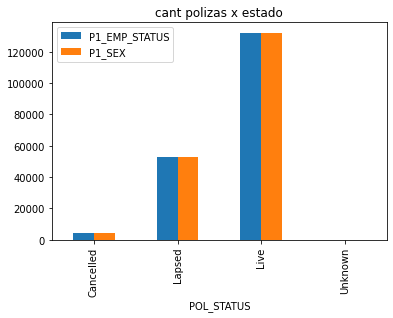

In [ ]:
#df_pol.plot(kind='bar', title="Cantidad de Estados de Poliza").legend(bbox_to_anchor= (1.02, 1));
# BUS_USE: Indicador de uso comercial
d = df['P1_SEX'].value_counts()
print("-->", d[["M"]])
df_pol[['P1_EMP_STATUS', 'P1_SEX']].plot(kind="bar", title="cant polizas x estado")

print(d)
df[['POL_STATUS']].astype("category")

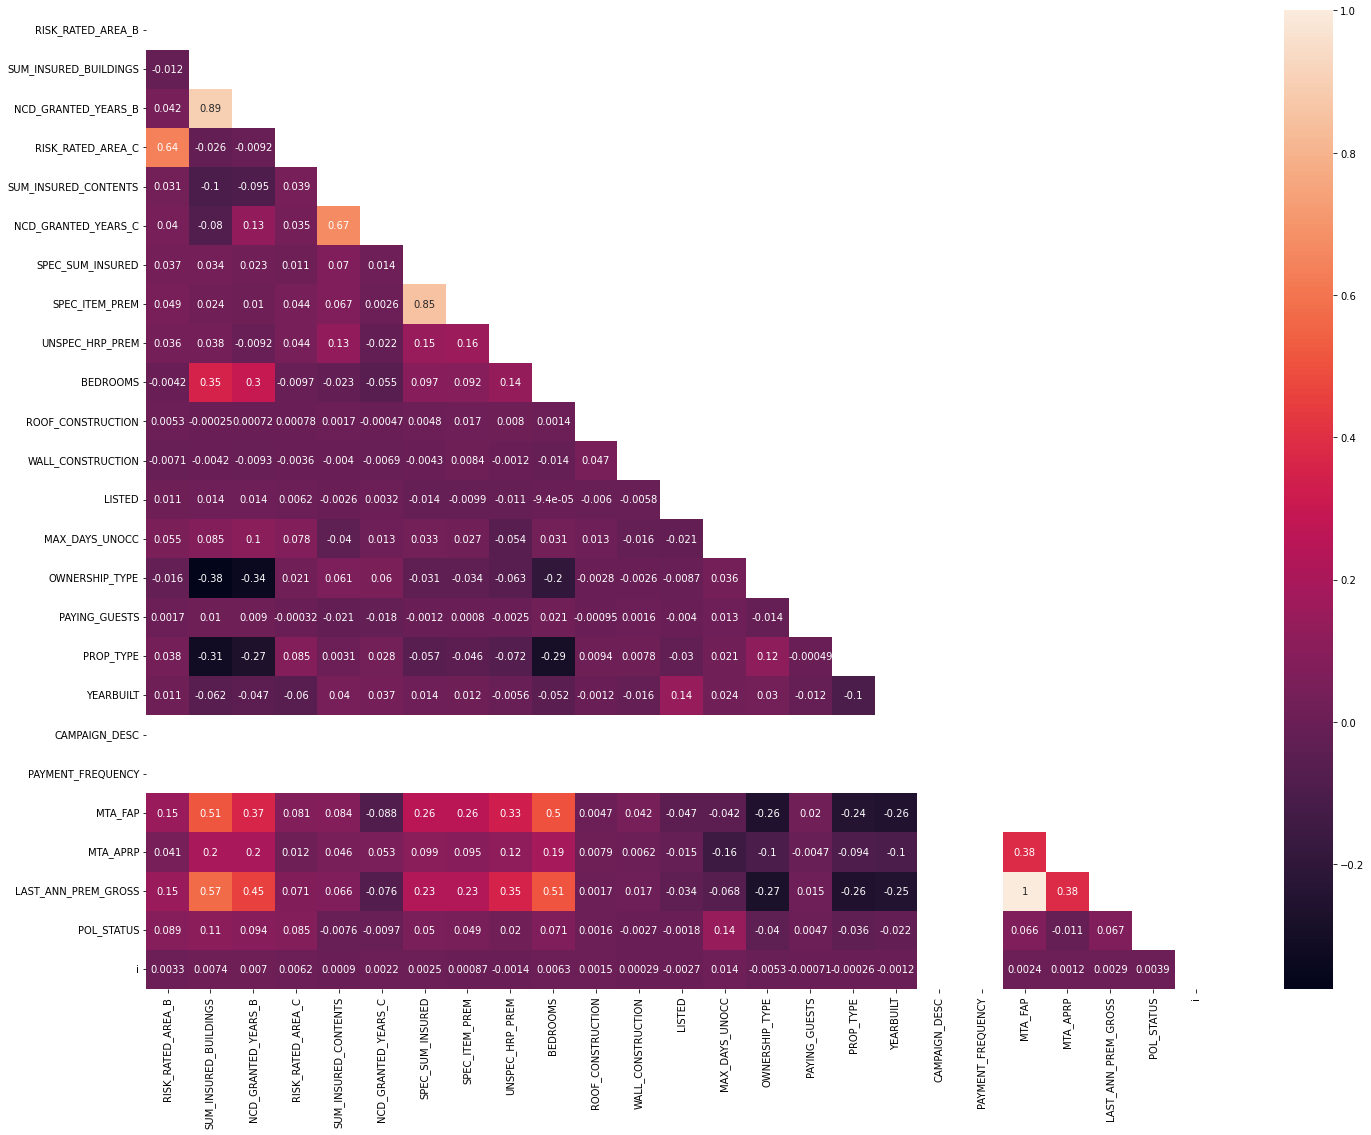

In [ ]:
#Definimos la matriz de correlación como la fuente de nuestros datos
corr = df.corr()

#Definimos el tamaño de la figura para asegurar que se observen los valores interiores
ax = plt.subplots(figsize=(24,18))

#Generamos una máscara para evitar tener un espejo en la parte superior de la gráfica y simplificar la observación
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

#Usando seaborn heatmap como tipo de gráfica, colocamos los valores, solicitamos que incluya las anotaciones y seleccionamos un mapa de color,
# en este caso utilizamos "viridis" y seleccionamos la máscara para no mostrar los datos duplicados, iniciando por la diagonal de unos en la 
# parte central de la gráfica
ax = sbn.heatmap(corr,annot=True,mask = mask) # cmap='viridis'

In [ ]:
cor = df.corr()
print("correlation de estado de la poliza = Pol_Status")
print(cor[["POL_STATUS"]].sort_values(by="POL_STATUS", ascending=False).head(5))
print("correlation de ")
print(cor[["POL_STATUS"]].sort_values(by="POL_STATUS", ascending=False).head(5))

,POL_STATUS
POL_STATUS,1.000000
MAX_DAYS_UNOCC,0.143808
SUM_INSURED_BUILDINGS,0.107597
NCD_GRANTED_YEARS_B,0.093892
RISK_RATED_AREA_B,0.089034
